In [1]:
from operator import itemgetter
import pandas as pd
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import matplotlib.pyplot as plt

In [2]:
edgelist = pd.read_csv("quakers_edgelist.csv")
edgelist

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


In [3]:
nodelist = pd.read_csv("quakers_nodelist.csv")
nodelist

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [4]:
G = nx.Graph()

In [5]:
G = nx.from_pandas_edgelist(edgelist, 'Source', 'Target')
G.add_nodes_from(nodes_for_adding=nodelist["Name"].tolist())

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [7]:
nx.set_node_attributes(G, nodelist.set_index("Name").to_dict("index"))

In [8]:
G.nodes["Joseph Wyeth"]

{'Historical Significance': 'religious writer',
 'Gender': 'male',
 'Birthdate': 1663,
 'Deathdate': 1731,
 'ID': 10013191}

In [9]:
density = nx.density(G)
density

0.02478279447372169

In [10]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")
fell_whitehead_path

['Margaret Fell', 'George Fox', 'George Whitehead']

In [11]:
nx.is_connected(G)

False

In [12]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 8


In [13]:
triadic_closure = nx.transitivity(G)
triadic_closure

0.16937799043062202

In [14]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [15]:
G.nodes['William Penn']

{'Historical Significance': 'Quaker leader and founder of Pennsylvania',
 'Gender': 'male',
 'Birthdate': 1644,
 'Deathdate': 1718,
 'ID': 10009531,
 'degree': 18}

In [16]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [17]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [18]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

In [19]:
communities = community.greedy_modularity_communities(G)

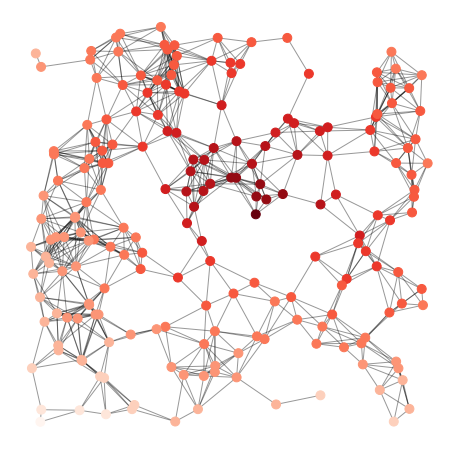

In [24]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [20]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

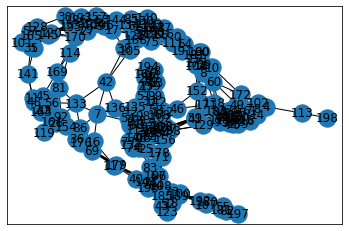

In [29]:
nx.draw_networkx(G)